<a href="https://colab.research.google.com/github/among5094/SWMilitaryAcademy/blob/main/0630(%EA%B8%88)ffnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 7. custom FFNN
#### 1) 활성화함수가 있는 FFNN
활성화 함수가 있는 FFNN를 구현해 보자.
$$\begin{aligned}
s &= x \cdot w + b \\
\hat y &= f(s) \\
e = Loss(w,b) &= (\hat y - y)^2 \\
& \\
\cfrac {\partial Loss(w,b)}{\partial w} &= \cfrac{\partial Loss(w,b)}{\partial \hat y} \cfrac{\partial \hat y}{\partial s} \cfrac{\partial s}{\partial w} \\
&= x^T \cdot 2(\hat y - y)f^{'}(s)\\
\cfrac {\partial Loss(w,b)}{\partial b} &= 1 \cdot 2(\hat y - y)f^{'}(s) \\
(p, o=1) &= (B, p)^T \cdot [(B, 1) \times (B, 1)]
\end{aligned}$$
- p: 변수의 수
- o: 출력의 수
- B: batch size

참고로:
$$\begin{aligned}
f(x) &= \tanh(x) \\
f^{'}(x) &= 1 - \tanh^2(x)
\end{aligned}$$

이를 위해 propagate_forward(self, x)함수를 구해보자.

In [ ]:
%matplotlib inline
import numpy as np
np.random.seed(123)

x_train = np.random.rand(1024, 1)
y_train = x_train * 0.1 - 0.05 # w = 0.1, b = -0.05

x_val = np.random.rand(32).reshape(-1,1)
y_val = x_val * 0.1 - 0.05

x_test = np.arange(0, 10, 2).reshape(-1,1)*.1
y_test = x_test * 0.1 - 0.05

In [ ]:
class FFNN:
    def __init__(self, lr=0.01):
        self.lr = lr
        # initial weights: w는 .5, b는 .0
        self.w = np.array([0.5]).reshape(-1, 1)
        self.b = np.array([0.])

    def calc_sum(self, x, w, b):
        return np.dot(x, w) + b

    # feed forward network
    def predict(self, x):
        return np.tanh(self.calc_sum(x, self.w, self.b))

    # train for one batch. x 자체가 batch
    def train_on_batch(self, x, y, istrain=True):
        yhat = self.predict(x)
        loss = np.sum((yhat - y)**2)
        if istrain:
            rows = x.shape[0]
            dw = x.T.dot((yhat - y)*(1 - yhat**2))
            db = np.ones(rows).dot((yhat - y)*(1 - yhat**2))
            self.w -= self.lr * dw
            self.b -= self.lr * db
        return loss

    def fit(self, x, y, batch_size=16, epochs=100, val_data=None):
        Losses = {}
        Losses["train_loss"] = []
        if val_data is not None:
            Losses["val_loss"] = []

        rows = x.shape[0]
        idxs = np.arange(rows)
        for i in range(epochs):
            Loss = 0
            np.random.shuffle(idxs)

            for j in range(0, rows, batch_size):
                x_batch = x[idxs[j:j+batch_size]]
                y_batch = y[idxs[j:j+batch_size]]
                Loss += self.train_on_batch(x_batch, y_batch)

            Loss /= rows
            print("Train Loss at Epoch %d is %.8f" %(i, Loss))
            Losses["train_loss"].append(Loss)
            if val_data is not None:
                valrows = val_data[0].shape[0]
                val_loss = self.train_on_batch(*val_data, istrain=False)/valrows
                print("Val Loss at Epoch %d is %.8f" %(i, val_loss))
                Losses["val_loss"].append(val_loss)

        return Losses

In [ ]:
model = FFNN()

In [ ]:
hist = model.fit(x_train, y_train, val_data=(x_val, y_val))

Train Loss at Epoch 0 is 0.00690161
Val Loss at Epoch 0 is 0.00256712
Train Loss at Epoch 1 is 0.00114082
Val Loss at Epoch 1 is 0.00068765
Train Loss at Epoch 2 is 0.00030936
Val Loss at Epoch 2 is 0.00017958
Train Loss at Epoch 3 is 0.00008346
Val Loss at Epoch 3 is 0.00004913
Train Loss at Epoch 4 is 0.00002237
Val Loss at Epoch 4 is 0.00001389
Train Loss at Epoch 5 is 0.00000608
Val Loss at Epoch 5 is 0.00000370
Train Loss at Epoch 6 is 0.00000163
Val Loss at Epoch 6 is 0.00000098
Train Loss at Epoch 7 is 0.00000044
Val Loss at Epoch 7 is 0.00000025
Train Loss at Epoch 8 is 0.00000012
Val Loss at Epoch 8 is 0.00000007
Train Loss at Epoch 9 is 0.00000003
Val Loss at Epoch 9 is 0.00000002
Train Loss at Epoch 10 is 0.00000001
Val Loss at Epoch 10 is 0.00000000
Train Loss at Epoch 11 is 0.00000000
Val Loss at Epoch 11 is 0.00000000
Train Loss at Epoch 12 is 0.00000000
Val Loss at Epoch 12 is 0.00000000
Train Loss at Epoch 13 is 0.00000000
Val Loss at Epoch 13 is 0.00000000
Train Loss a

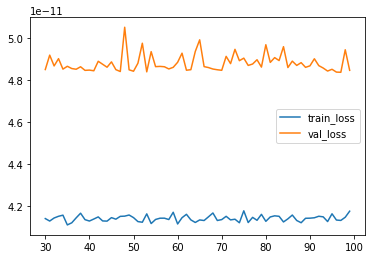

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist)[30:].plot()

In [ ]:
testdf = pd.DataFrame({'pred':model.predict(x_test).ravel(), 'target':y_test.ravel()})

In [ ]:
testdf

,pred,target
0,-0.049984,-0.05
1,-0.030006,-0.03
2,-0.010005,-0.01
3,0.010005,0.01
4,0.030006,0.03


In [ ]:
model.w, model.b

(array([[0.10005079]]), array([-0.0500252]))

[Quiz] test 데이터에 대한 $R^2$를 구하자.
$$1 - \cfrac {SSE}{SST} = 1 - \cfrac {\sum_i (y_i - \hat y_i)^2}{\sum_i (y_i - \bar y)^2}$$

In [ ]:
1 - ((testdf.pred - testdf.target)**2).mean() / testdf.target.var(ddof=0)

0.9999999013871843

In [ ]:
1 - (testdf.pred - testdf.target).var() / testdf.target.var()

0.9999999162625023